<a href="https://colab.research.google.com/github/itsmimahi/ML-Regression-Capstone/blob/main/copy_of_ml_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing important liabraries or packages.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path
file_path = ('/content/drive/MyDrive/ML Regression Project/SeoulBikeData.csv')

In [5]:
# Loading csv file.
bike_df = pd.read_csv(file_path, encoding='latin')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# `DATA PREPROCESSING`

In [42]:
# Check the total number of rows and columns.
print(f'The shape of dataset is {bike_df.shape}\nTotal number of rows are {(bike_df.shape)[0]}\nTotal number of columns are {(bike_df.shape)[1]}')

The shape of dataset is (8760, 15)
Total number of rows are 8760
Total number of columns are 15


In [41]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekday_or_weekend     8760 non-null   int64  
dtypes: f

In [8]:
# Looking for duplicate rows.
bike_df.duplicated().value_counts()

False    8760
dtype: int64

##1) Null values or missing values present in our dataset are - 0
##2) Duplicate rows present in our dataset are - 0
##3) Need to change datatype of Column 'DATE'
##4) Need to convert objct values in numeric value of column 'SEASON','HOLIDAY', 'FUNCTIONING DAY' for modelling purpose.
##5) Need to rename column name since column name also consists unit too which will raise issues while working on dataset.

In [40]:
bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekday_or_weekend'],
      dtype='object')

In [39]:
# Need to change datatype of Column 'DATE'.

bike_df['Date'] = bike_df['Date'].astype('datetime64[ns]')

# Changing column 'DATE' into two more column 'MONTH' (eg:1,2,3,4,5....12),'DAY' (eg:Monday,Tuesday.....,Sunday)
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day_name()           

# Changes which we have done.
bike_df.head()

KeyError: ignored

In [38]:
bike_df['weekday_or_weekend'] = bike_df['Day'].apply(lambda x: 1 if x=='Sunday' or x=='Saturday' else 0)

KeyError: ignored

In [44]:
# Now we can drop column 'DAY', 'DATE'we do not need them anymore.
# bike_df.drop(columns=['Date',"Day"], axis= 1, inplace=True)
bike_df.drop(['Date',"Day"],axis=1 ,inplace=True)

# bike_df.head(1)

KeyError: ignored

In [45]:
# Need to rename column name since column name also consists unit too which will raise issues while working on dataset.

bike_df.rename({'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed', 'Visibility (10m)': 'Visibility',
                'Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_radiation', 'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'}, inplace=True, axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,weekday_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [32]:
# Need to convert objct values in numeric value of column 'SEASON','HOLIDAY', 'FUNCTIONING DAY' for modelling purpose.

# bike_df['Holiday'] = bike_df['Holiday'].apply(lambda x: 1 if x=='Holiday' or lambda x:0 if x=='No holiday'

# bike_df['Functioning Day'] = bike_df['Functioning Day'].apply(lambda x: 1 if x=='Yes' or lambda x:0 if x=='No')


In [15]:
# As you can see column 'DATE' and 'DAY' has removed
bike_df.head(2)

,Rented Bike Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,weekday_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [16]:
# Get distint values of column 'SEASON'.
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [17]:
# Get distint values of column 'HOLIDAY'
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [18]:
# Get distint values of column 'FUNCTIONING DAY'
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [46]:
# Get distint values of column 'WEEKDAY OR WEEKEND'
bike_df['weekday_or_weekend'].value_counts()

0    8760
Name: weekday_or_weekend, dtype: int64

In [47]:
# Get distint values of column 'MONTH'
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [21]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc

bike_df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Month,weekday_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.0
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.0
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.0
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.0
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.0
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.0
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,0.0
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,0.0


In [22]:
# check for Null values in our bike data
# as we can see we don't have any null values.
bike_df.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Month                    0
weekday_or_weekend       0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

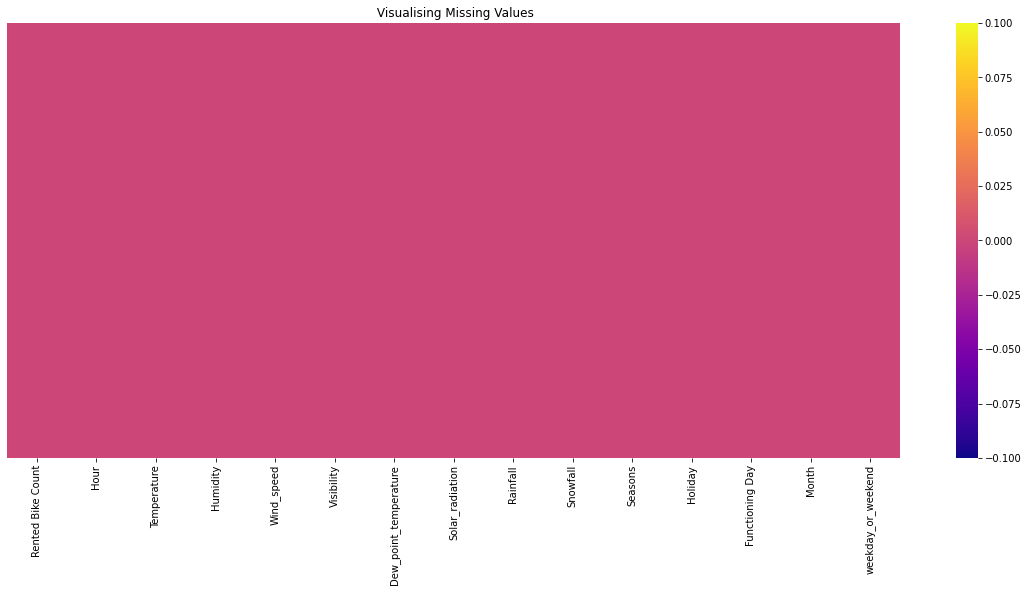

In [23]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

# `EXPLORATARY DATA ANALYSIS (EDA)`

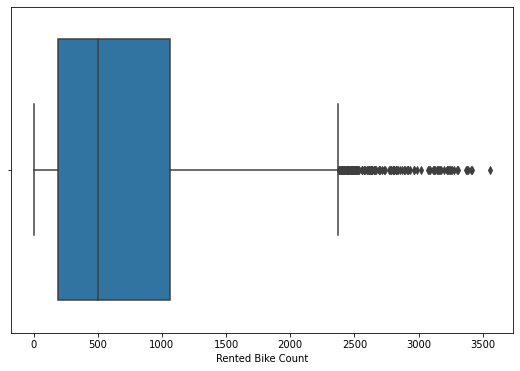

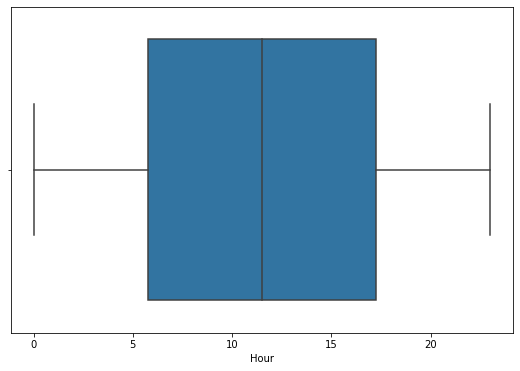

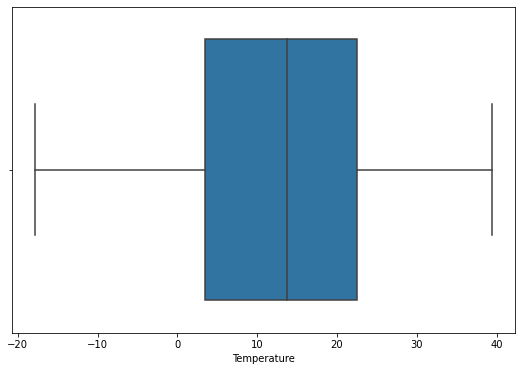

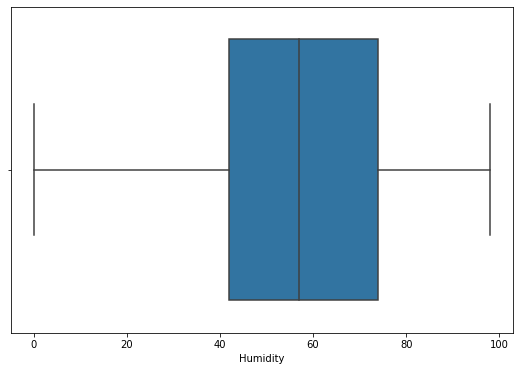

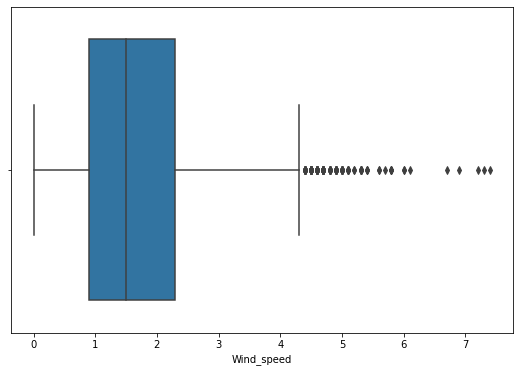

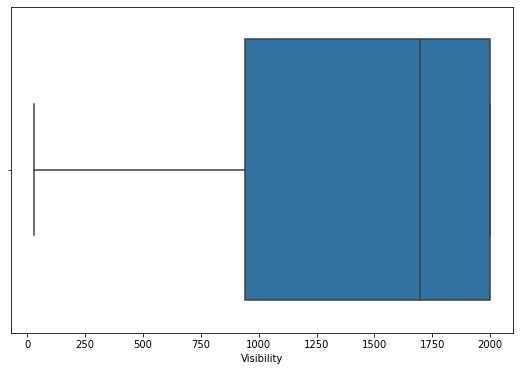

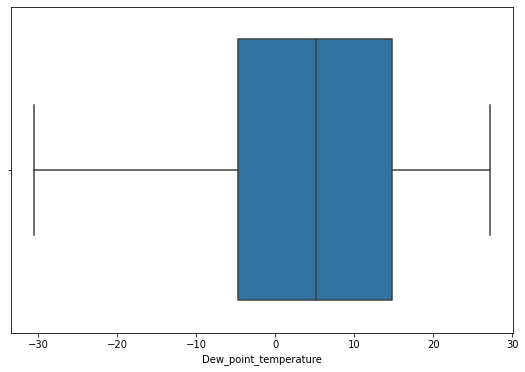

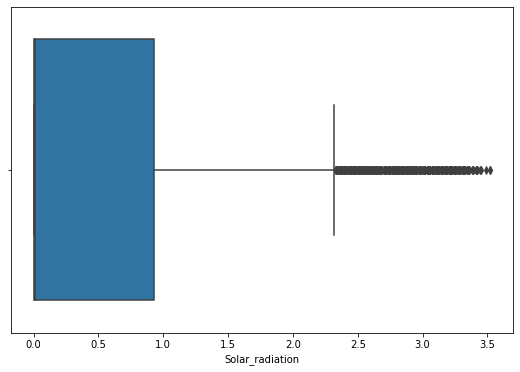

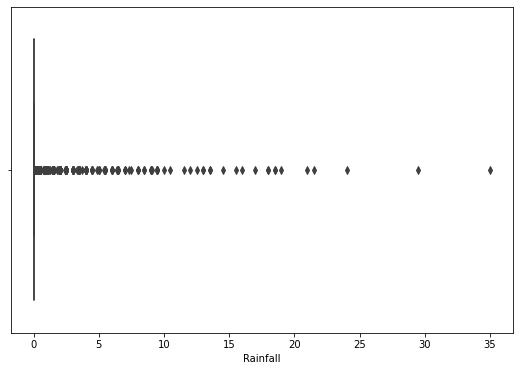

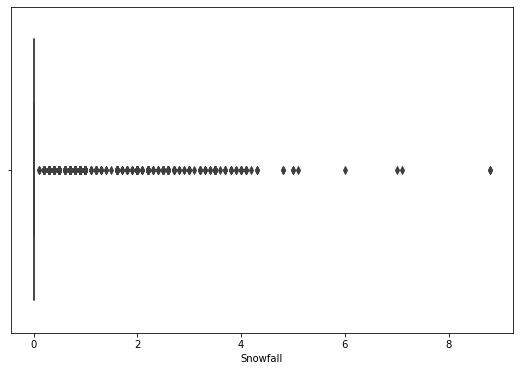

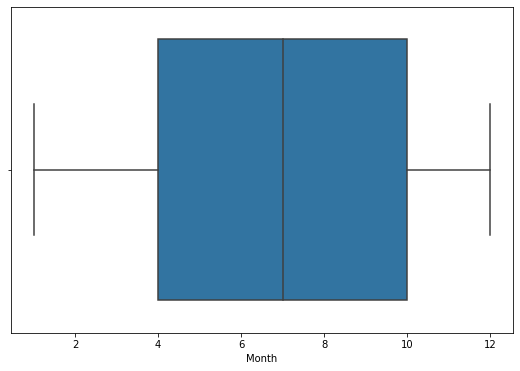

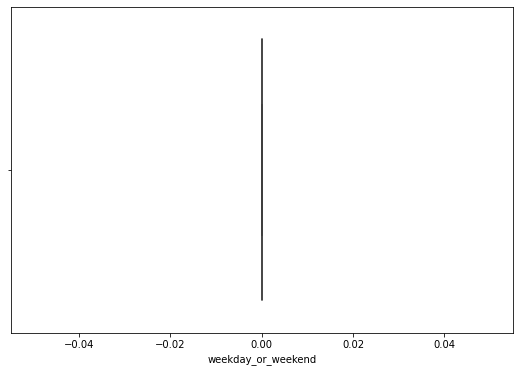

In [24]:

# create numeric columns list.
numeric_col=bike_df.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(bike_df.columns) - set(bike_df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

In [28]:
bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekday_or_weekend'],
      dtype='object')

KeyError: ignored

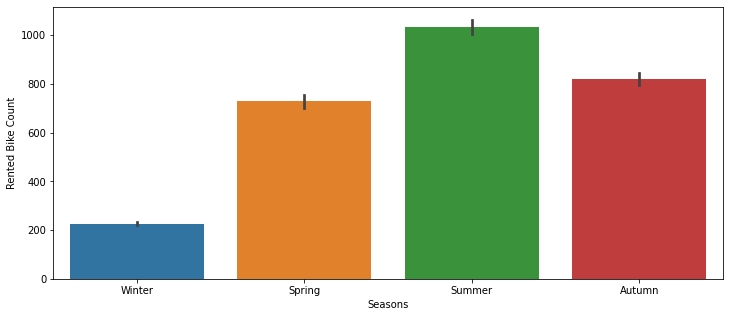

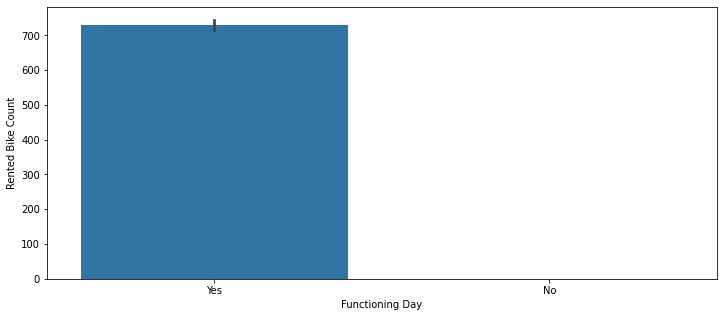

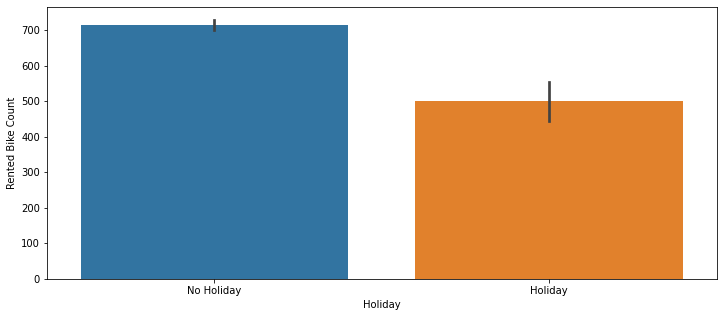

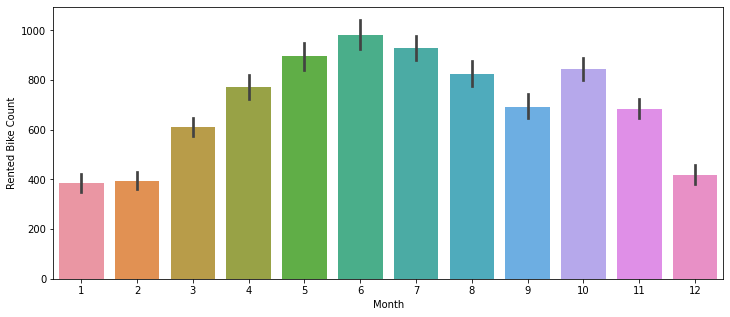

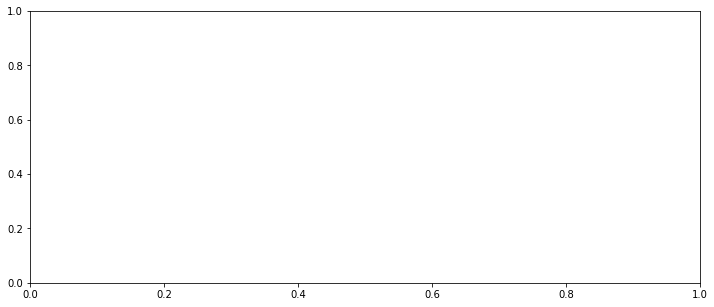

In [30]:
# adding two  more categorical columns 
categorical_columns.extend(['Month','weekday_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=bike_df[col],y=bike_df['Rented Bike Count'])

#Observations From Above Barcharts:
1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

4) Most of the bikes were rented on Weekdays compared to weekends.

5) From March Bike Rent Count started increasing and it was highest in June

#Let's check Bike Rent Count trend with respect to Hour on Functioning days,weekends or weekdays,seasons,Holidays columns.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

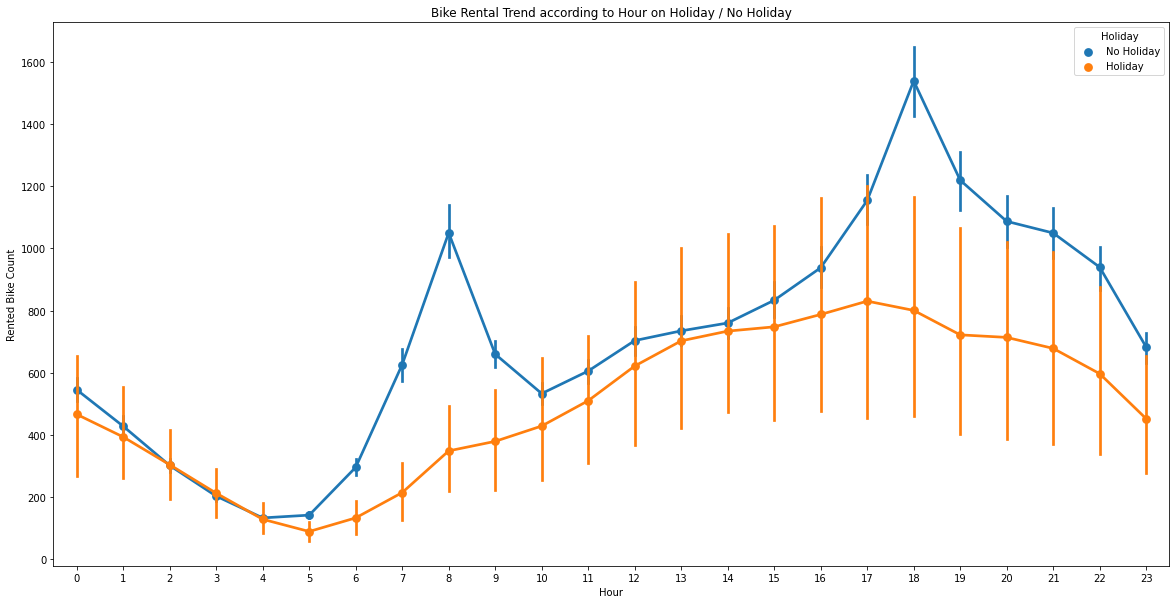

In [49]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'],hue=bike_df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

#Observation

1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday).

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

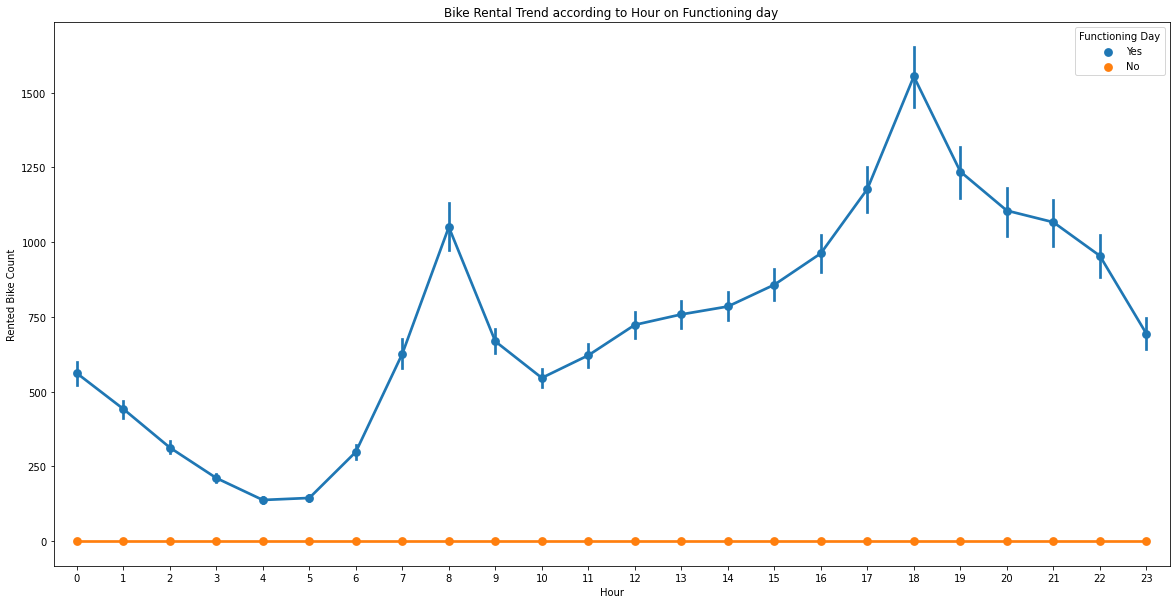

In [50]:
## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'],hue=bike_df['Functioning Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Observation

1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.

(if we drop no fucntioning day rows. we will left only with the functioning day values.thus the column having same value through out will not be helpful.
So,its better to drop the column.)

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

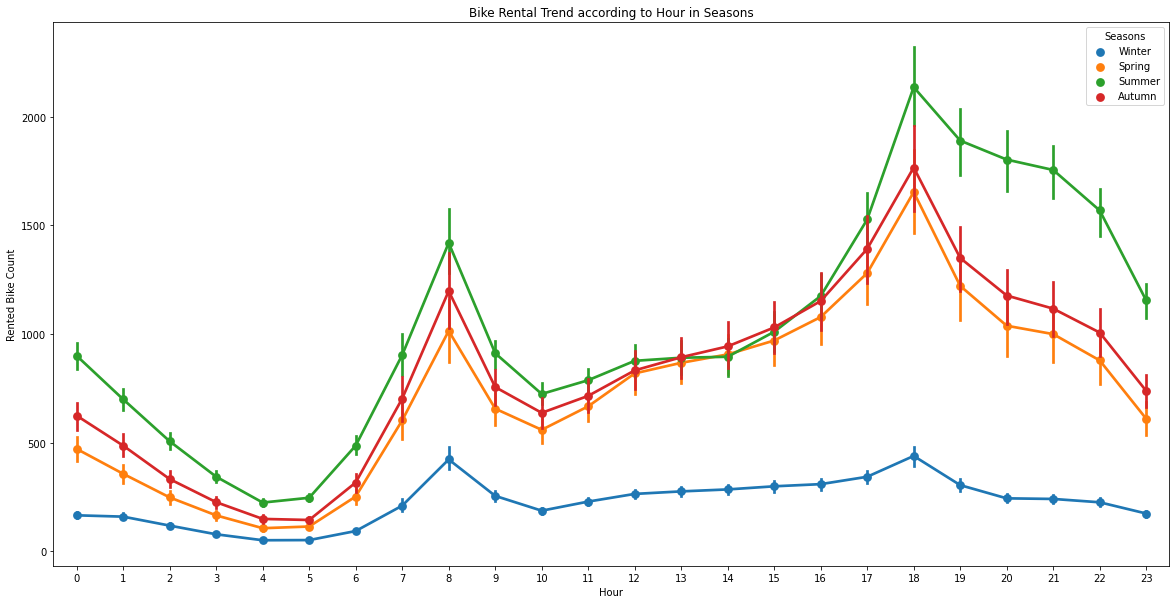

In [51]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'],hue=bike_df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

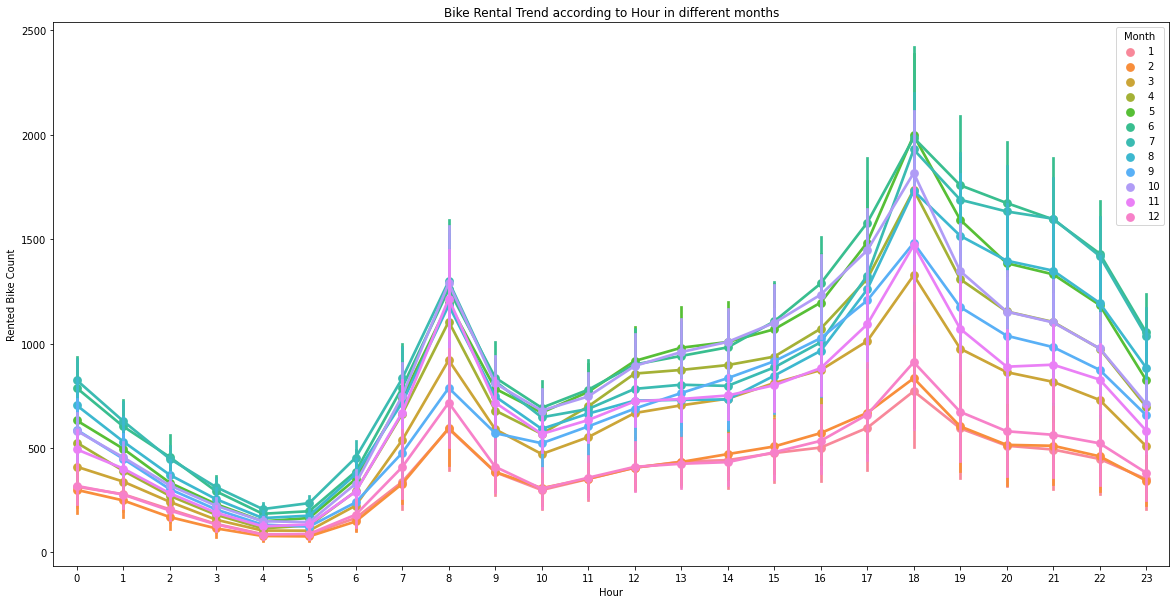

In [53]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'],hue=bike_df['Month'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

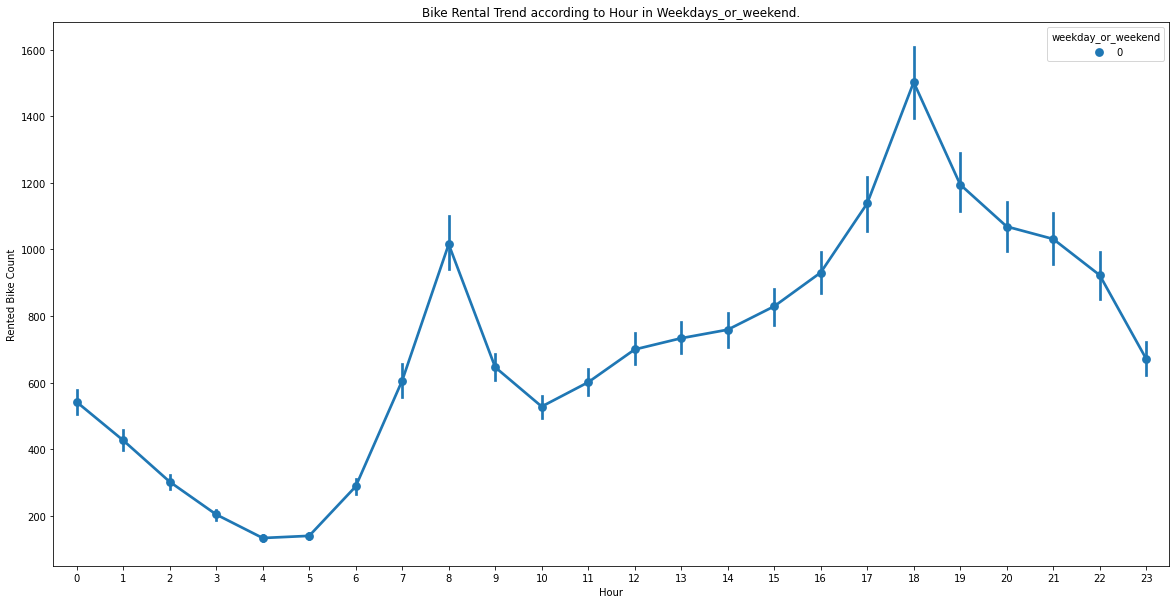

In [56]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'],hue=bike_df['weekday_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend

#Let's check distribution of target variable- "Bike Rented Count"

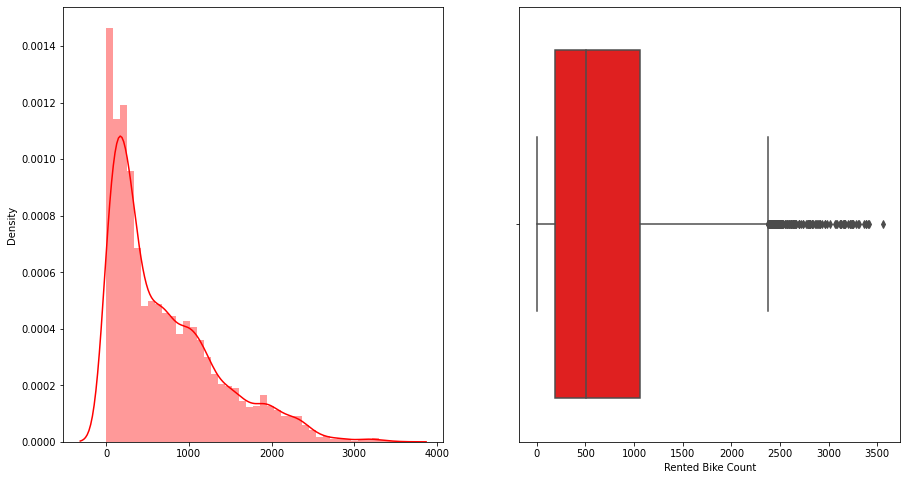

In [58]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=bike_df['Rented Bike Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=bike_df['Rented Bike Count'],color='red',ax=axes[1])

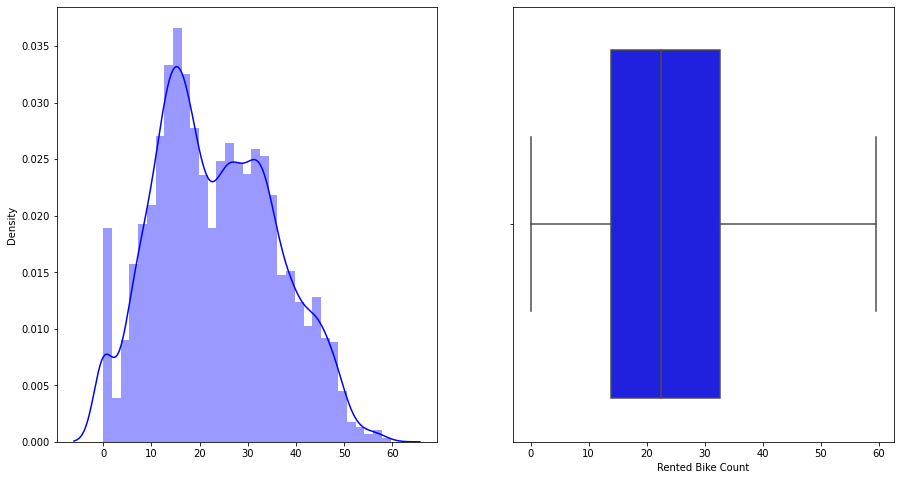

In [61]:
#  Our target varibale's distribution is slightly right skewed.
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(bike_df['Rented Bike Count']),color='b',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_df['Rented Bike Count']),color='b',ax=axes[1])

Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present

##Let's check distribution of independent variables

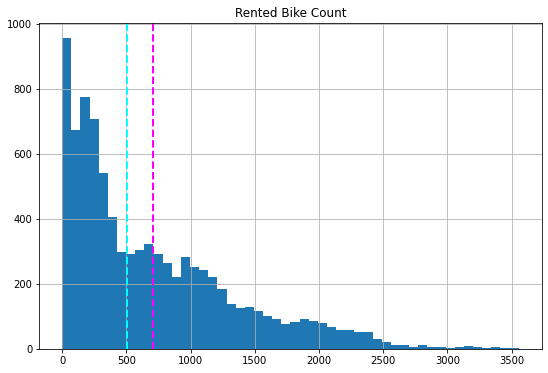

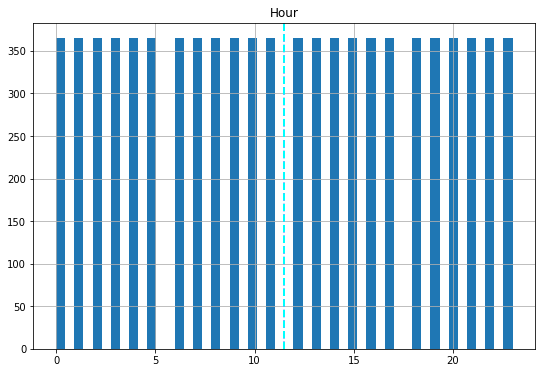

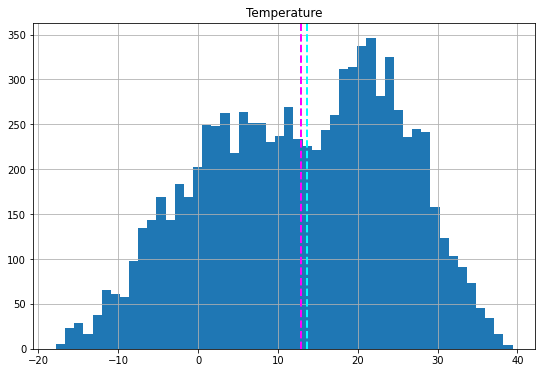

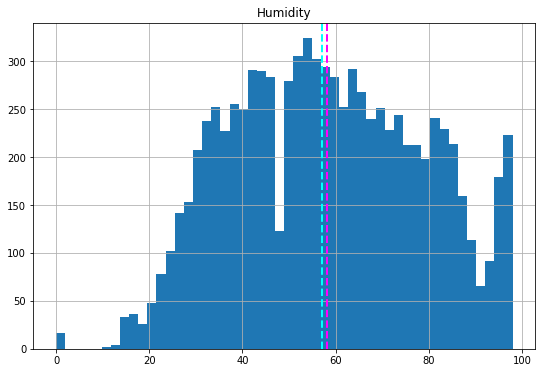

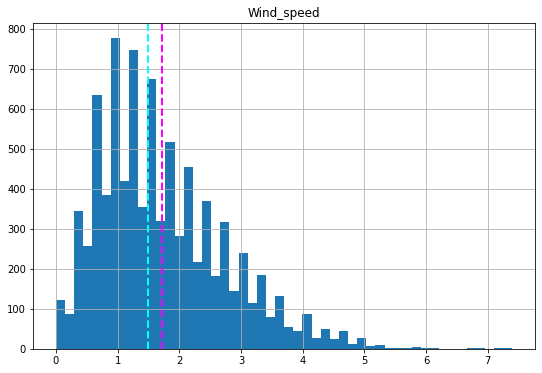

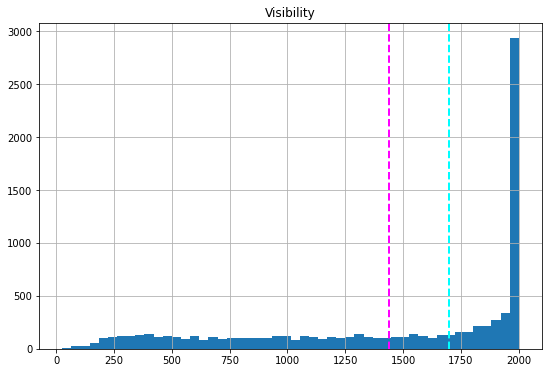

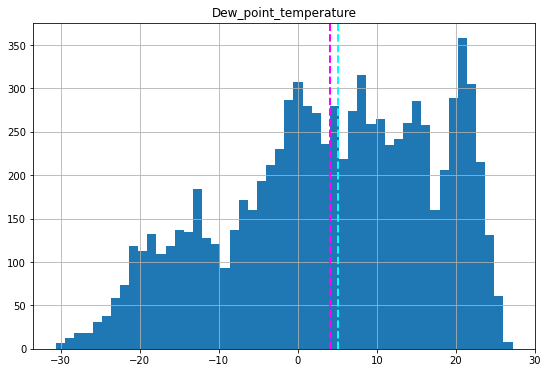

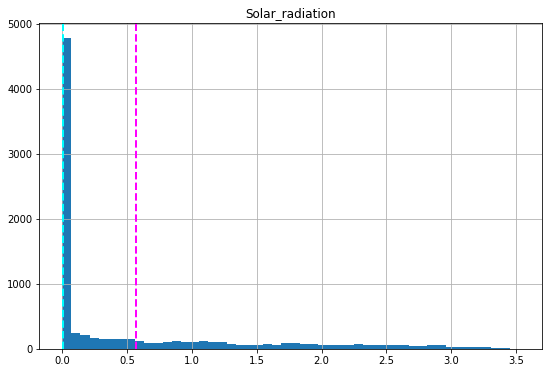

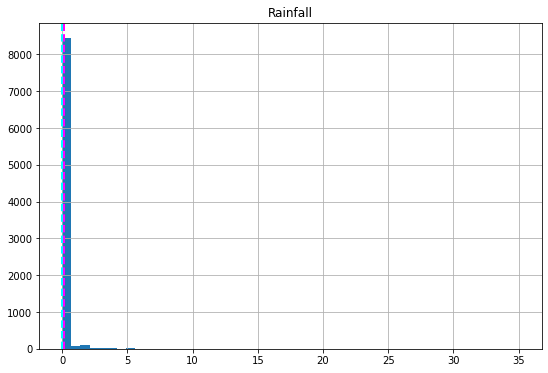

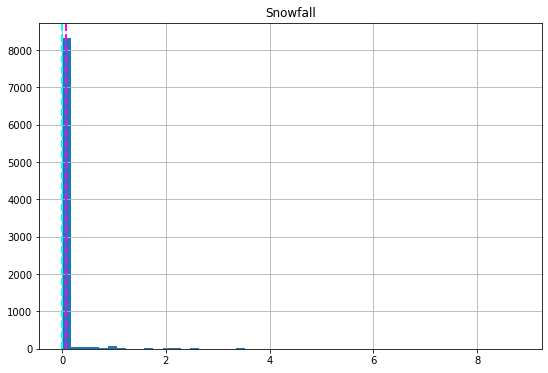

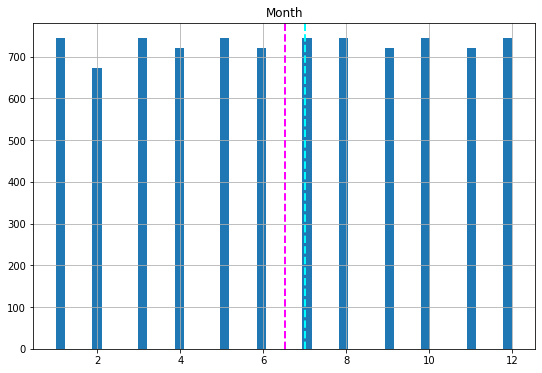

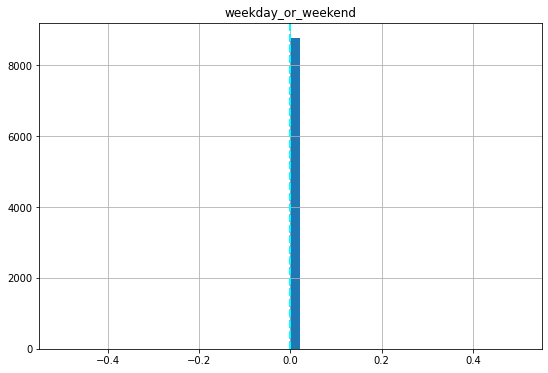

In [62]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()